
<img align="left" src = https://scienceserver.linea.org.br/images/linea-logo.png width=120 style="padding: 20px"> <br> 
<img align="left" src = https://jupyter.org/assets/homepage/hublogo.svg width=200 style="padding: 20px"> <br> 
<br>
<br>
<br>
<br>

 

Notebook original: Julia Gschwend

Adaptação: Heleno Campos e Marcela Vitti

***


Bem vindo(a) ao LIneA JupyterHub! 

O LIneA JupyterHub oferece acesso a dados públicos disponíveis online e a dados privados de levantamentos fotométricos cuja participação de cientistas brasileiros com _data rights_ é apoiada pelo LIneA. Neste notebook vamos exemplificar o acesso aos dados públicos do levantamento _Dark Energy Survey_ (DES). Caso precise de ajuda, entre em contato pelo e-mail: [helpdesk@linea.org.br](mailto:helpdesk@linea.org.br)


## 1. Sobre os dados

<img align="left" src=https://www.darkenergysurvey.org/wp-content/uploads/2016/01/des-logo-rev-lg.png width=400 style="background-color:black; padding: 20px">


<img align="left" src=https://www.darkenergysurvey.org/wp-content/uploads/2016/05/12-0333-22D.jpg width=400 style="background-color:black; padding: 20px; margin-right: 2em"> <br>




O [Dark Energy Survey (DES)](https://www.darkenergysurvey.org/) é um levantamento fotométrico em 5 bandas do ótico ao infravermelho (_grizY_) que tem como principal objetivo a determinação da equação de estado da energia escura. O DES observou ~700 milhões de objetos detectados em ~5000 graus quadrados no hemisfério sul durante 6 anos. Os artigos com os principais resultados da análise dos dados dos três primeiros anos de observação estão disponíveis [nesta página](https://www.darkenergysurvey.org/des-year-3-cosmology-results-papers/).  
<img align="center" src=https://www.darkenergysurvey.org/wp-content/uploads/2021/06/dr2_footprint.png  width=500 style="padding: 20px"> <br> 
Figura: Footprint Data Release 2 (fonte: [www.darkenergysurvey.org](https://www.darkenergysurvey.org/wp-content/uploads/2021/06/dr2_footprint.png)).  

O [segundo _data release_ (DR2)](https://des.ncsa.illinois.edu/releases/dr2), já contendo os dados dos seis anos de observação, está disponível para público e pode ser acessado pelo [LIneA Science Server](https://desportal2.cosmology.illinois.edu/sky/) ou aqui pelo JupyterHub, como veremos a seguir.

## 2. Acesso ao banco de dados 

Dentro da plataforma LIneA JupyterHub, o acesso ao banco de dados é feito através da biblioteca [`dblinea`](https://github.com/linea-it/dblinea), que já está disponível no ambiente. Confira a documentação completa da biblioteca `dblinea` [neste link](https://dblinea.readthedocs.io/en/latest/index.html).


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord

from dblinea import DBBase

%reload_ext autoreload
%autoreload 2

**Leitura dos dados**


A classe `DBBase` faz a conexão com o banco de dados e oferece algumas funcionalidades como veremos a seguir. Nos exemplos abaixo, vamos acessar os dados da tabela **coadd_objects** do catálogo **DES DR2**. 

In [2]:
db = DBBase()

In [3]:
schema = "des_dr2"  
tablename = "main"

Para obter a lista de colunas disponíveis: 

In [4]:
db.get_table_columns(tablename, schema=schema)

['coadd_object_id',
 'tilename',
 'hpix_32',
 'hpix_64',
 'hpix_1024',
 'hpix_4096',
 'hpix_16384',
 'ra',
 'dec',
 'alphawin_j2000',
 'deltawin_j2000',
 'galactic_l',
 'galactic_b',
 'xwin_image',
 'ywin_image',
 'a_image',
 'erra_image',
 'b_image',
 'errb_image',
 'theta_j2000',
 'errtheta_image',
 'kron_radius',
 'ebv_sfd98',
 'mag_auto_g_dered',
 'mag_auto_r_dered',
 'mag_auto_i_dered',
 'mag_auto_z_dered',
 'mag_auto_y_dered',
 'wavg_mag_psf_g_dered',
 'wavg_mag_psf_r_dered',
 'wavg_mag_psf_i_dered',
 'wavg_mag_psf_z_dered',
 'wavg_mag_psf_y_dered',
 'extended_class_coadd',
 'extended_class_wavg',
 'flags_g',
 'imaflags_iso_g',
 'nepochs_g',
 'flags_r',
 'imaflags_iso_r',
 'nepochs_r',
 'flags_i',
 'imaflags_iso_i',
 'nepochs_i',
 'flags_z',
 'imaflags_iso_z',
 'nepochs_z',
 'flags_y',
 'imaflags_iso_y',
 'nepochs_y',
 'xwin_image_g',
 'xwin_image_r',
 'xwin_image_i',
 'xwin_image_z',
 'xwin_image_y',
 'ywin_image_g',
 'ywin_image_r',
 'ywin_image_i',
 'ywin_image_z',
 'ywin_imag

Para saber o tipo de dado em cada coluna: 

In [5]:
db.describe_table(tablename, schema=schema)

[{'name': 'coadd_object_id', 'type': BIGINT()},
 {'name': 'tilename', 'type': TEXT()},
 {'name': 'hpix_32', 'type': BIGINT()},
 {'name': 'hpix_64', 'type': BIGINT()},
 {'name': 'hpix_1024', 'type': BIGINT()},
 {'name': 'hpix_4096', 'type': BIGINT()},
 {'name': 'hpix_16384', 'type': BIGINT()},
 {'name': 'ra', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'dec', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'alphawin_j2000', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'deltawin_j2000', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'galactic_l', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'galactic_b', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'xwin_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'ywin_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'a_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'erra_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'b_image', 'type': DOUBLE_PRECISION(precision=53)},
 {'n

A função `fetchall(query)` faz a consulta no banco de dados e retorna uma lista de tuplas com os dados referentes à _query_ fornecida no argumento. Por exemplo, vamos consultar o identificador único e as coordenadas dos objetos nas 10 primeiras linhas da tabela.  

In [6]:
query = "SELECT coadd_object_id, ra, dec FROM des_dr2.main limit 10"
lista_10_objetos = db.fetchall(query)
lista_10_objetos

[(948610645, 331.263062, -40.402503),
 (948610504, 331.269362, -40.401092),
 (948610122, 331.266044, -40.396585),
 (948610353, 331.268755, -40.398999),
 (948610288, 331.267864, -40.398039),
 (948610673, 331.273754, -40.402937),
 (948609315, 331.264661, -40.394108),
 (948610127, 331.269053, -40.39574),
 (948609995, 331.270573, -40.394107),
 (948609699, 331.272105, -40.391052)]

A função `fetchall_dict(query)` faz a consulta no banco de dados e retorna uma lista de dicionários com os dados referentes à _query_ fornecida no argumento. Vamos repetir a consulta do exemplo anterior, ou seja, vamos utilizar o mesmo _SQL statement_ atribuído à variável `query`.    

In [7]:
dict_10_objetos = db.fetchall_dict(query)
dict_10_objetos

[{'coadd_object_id': 948610645, 'ra': 331.263062, 'dec': -40.402503},
 {'coadd_object_id': 948610504, 'ra': 331.269362, 'dec': -40.401092},
 {'coadd_object_id': 948610122, 'ra': 331.266044, 'dec': -40.396585},
 {'coadd_object_id': 948610353, 'ra': 331.268755, 'dec': -40.398999},
 {'coadd_object_id': 948610288, 'ra': 331.267864, 'dec': -40.398039},
 {'coadd_object_id': 948610673, 'ra': 331.273754, 'dec': -40.402937},
 {'coadd_object_id': 948609315, 'ra': 331.264661, 'dec': -40.394108},
 {'coadd_object_id': 948610127, 'ra': 331.269053, 'dec': -40.39574},
 {'coadd_object_id': 948609995, 'ra': 331.270573, 'dec': -40.394107},
 {'coadd_object_id': 948609699, 'ra': 331.272105, 'dec': -40.391052}]

A função `fetchall_df(query)` faz a consulta no banco de dados e retorna um objeto do tipo [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) com os dados referentes à _query_ fornecida no argumento. Vamos repetir a consulta dos exemplo anteriores:

In [8]:
dataframe_10_objetos = db.fetchall_df(query)
dataframe_10_objetos

,coadd_object_id,ra,dec
0,948610645,331.263062,-40.402503
1,948610504,331.269362,-40.401092
2,948610122,331.266044,-40.396585
3,948610353,331.268755,-40.398999
4,948610288,331.267864,-40.398039
5,948610673,331.273754,-40.402937
6,948609315,331.264661,-40.394108
7,948610127,331.269053,-40.395740
8,948609995,331.270573,-40.394107
9,948609699,331.272105,-40.391052


### Exemplos 

Para ilustrar a visualização de uma pequena amostra de dados, vamos construir o diagrama cor-magnitude com as estrelas da [galáxia anã de Sculptor](https://en.wikipedia.org/wiki/Sculptor_Dwarf_Galaxy). 

|Coordenadas Equatoriais| |
|:-- |--- | 
|Ascensão Reta| 01h 00m 09.3s |
|Declinação| −33° 42' 33" |




A tabela abaixo traz os significados das colunas que vamos utilizar para fazer a consulta no banco de dados. A lista completa de colunas disponíveis na tabela **DES DR2** está disponível [nesta página](https://des.ncsa.illinois.edu/releases/dr2/dr2-products/dr2-schema). 


|Coluna | Significado |
|---|---|
|COADD_OBJECT_ID | Unique identifier for the coadded objects|
|RA | Right ascension, with quantized precision for indexing (ALPHAWIN_J2000 has full precision but not indexed) [degrees]|
|DEC | Declination, with quantized precision for indexing (DELTAWIN_J2000 has full precision but not indexed) [degrees] |
|EXTENDED_CLASS_COADD |0: high confidence stars; 1: candidate stars; 2: mostly galaxies; 3: high confidence galaxies; -9: No data; Using Sextractor photometry |
|FLAGS_{G,R,I,Z,Y}| Additive flag describing cautionary advice about source extraction process. Use less than 4 for well behaved objects |
|MAG_AUTO_{G,R,I,Z,Y} | Magnitude estimation, for an elliptical model based on the Kron radius [mag] |
|MAG_AUTO_{G,R,I,Z,Y}_DERED | Dereddened magnitude estimation (using SFD98), for an elliptical model based on the Kron radius [mag]|




Para fazer uma busca pelas coordenadas no banco, precisamos converter as unidades para graus. Para isto, vamos usar a classe `SkyCoord` do módulo `astropy.coordinates` (veja detalhes na [documentação do Astropy](https://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html)):

In [9]:
c = SkyCoord('01h00m09.3s', '−33d42m33s', frame='icrs')
c  

<SkyCoord (ICRS): (ra, dec) in deg
    (15.03875, -33.70916667)>

In [10]:
print(f"R.A.: {c.ra.deg:.1f} degrees")
print(f"Dec.: {c.dec.deg:.1f} degrees")

R.A.: 15.0 degrees
Dec.: -33.7 degrees


Os dois exemplos abaixos mostram a consulta das magnitudes nas bandas _g, r, i_ corrigidas do avermelhamento (sufixo _dered_) e seus respectivos erros, para uma seleção de objetos classificados como estrelas (`extended_class_coadd < 2`, vide tabela acima).

#### **Exemplo 1: seleção de uma região "retangular"**

Para selecionar qualquer amostra com base nas coordenadas de posição, recomenda-se utilizar as funções da biblioteca [Q3C](https://github.com/segasai/q3c) ([Koposov, S., & Bartunov, O. 2006](http://adsabs.harvard.edu/abs/2006ASPC..351..735K)) para tirar vantagem da indexação das colunas. Uma busca por uma região no céu definida por faixas de coordenadas resultaria em uma varredura em todos os ~700 milhões de objetos, o que pode levar um tempo considerável!   


Para consultar objetos dentro de uma região contida em um polígono, basta informar os vértices do polígono pra a função `q3c_poly_query()`. A documentação das funções está disponível no [repositório do Q3C](https://github.com/segasai/q3c).  

Vamos selecionar as magnitudes de uma amostra de estrelas em uma região "quadrada" (na esfera celeste) de lado igual a 1 grau, ou seja, com uma margem de 0.5 graus em torno da posição do nosso alvo. 

**Vértices (ra, dec)**: (14.5, -34.2), (15.5, -34.2), (15.5, -33.2), (14.5, -33.2)

A query ficaria assim (o uso de letras maiúsculas é opcional):  

```sql 
SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, 
        mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i 
FROM des_dr2.main 
WHERE q3c_poly_query(ra, dec, ARRAY[14.5, -34.2, 15.5, -34.2, 15.5, -33.2, 14.5, -33.2])
AND extended_class_coadd < 2 
````

In [11]:
query_1 = "SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_poly_query(ra, dec, ARRAY[14.5, -34.2, 15.5, -34.2, 15.5, -33.2, 14.5, -33.2]) AND extended_class_coadd < 2 "        
query_1 

'SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_poly_query(ra, dec, ARRAY[14.5, -34.2, 15.5, -34.2, 15.5, -33.2, 14.5, -33.2]) AND extended_class_coadd < 2 '

In [12]:
%%time
dados_exemplo_1 = db.fetchall_df(query_1)

CPU times: user 833 ms, sys: 194 ms, total: 1.03 s
Wall time: 1.74 s


In [13]:
dados_exemplo_1

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1128471953,14.896175,-34.200946,0,22.658728,21.172165,19.749496,0.035185,0.013195,0.005885
1,1128471681,14.893178,-34.197574,0,25.825012,25.655903,25.835638,0.304367,0.360233,0.701122
2,1128471490,14.901140,-34.195903,0,24.434233,24.345684,24.800482,0.110466,0.150833,0.354438
3,1128471874,14.906911,-34.199477,0,25.299551,24.950388,25.560022,0.179304,0.198381,0.523991
4,1128471379,14.910607,-34.195033,0,25.881184,25.327541,25.223560,0.294656,0.246258,0.368272
...,...,...,...,...,...,...,...,...,...,...
92166,1130758330,15.485499,-33.201528,0,25.022491,24.395309,24.285072,0.213385,0.164300,0.248754
92167,1130758587,15.491425,-33.203738,0,23.196152,22.957445,22.797720,0.046357,0.051369,0.074333
92168,1130758607,15.494378,-33.203853,0,23.705183,23.715195,23.815224,0.074098,0.103252,0.190106
92169,1130758719,15.494668,-33.205149,0,22.176746,21.576063,21.418926,0.021386,0.016293,0.023481


In [14]:
dados_exemplo_1.head()

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1128471953,14.896175,-34.200946,0,22.658728,21.172165,19.749496,0.035185,0.013195,0.005885
1,1128471681,14.893178,-34.197574,0,25.825012,25.655903,25.835638,0.304367,0.360233,0.701122
2,1128471490,14.901140,-34.195903,0,24.434233,24.345684,24.800482,0.110466,0.150833,0.354438
3,1128471874,14.906911,-34.199477,0,25.299551,24.950388,25.560022,0.179304,0.198381,0.523991
4,1128471379,14.910607,-34.195033,0,25.881184,25.327541,25.223560,0.294656,0.246258,0.368272


#### **Exemplo 2: seleção de uma região  circular com Q3C**  

Para selecionar uma região circular, basta informar as coordenadas do centro da seleção e um raio (em graus) nos argumentos da função `q3c_radial_query()`. Para um diâmetro de 1 grau, a query ficaria assim:
    
```sql
SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, 
        mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i, 
FROM des_dr2.main 
WHERE q3c_radial_query(ra, dec, 15.0, -33.7, 0.5)
AND extended_class_coadd < 2 
````

In [15]:
query_2 = "SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_radial_query(ra, dec, 15.0, -33.7, 0.5) AND extended_class_coadd < 2 "
query_2    

'SELECT coadd_object_id, ra ,dec, flags_g, mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, magerr_auto_g, magerr_auto_r, magerr_auto_i FROM des_dr2.main WHERE q3c_radial_query(ra, dec, 15.0, -33.7, 0.5) AND extended_class_coadd < 2 '

In [16]:
%%time
dados_exemplo_2 = db.fetchall_df(query_2)

CPU times: user 824 ms, sys: 150 ms, total: 974 ms
Wall time: 1.68 s


In [17]:
dados_exemplo_2

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1128471439,14.926212,-34.195554,0,23.617884,23.387201,23.344702,0.052331,0.059823,0.095234
1,1128470994,14.925798,-34.192268,0,24.126692,24.006340,24.064320,0.139008,0.171081,0.308078
2,1128471035,14.937076,-34.192203,0,27.661129,26.805216,25.687660,1.590870,0.993660,0.620178
3,1128471545,14.946218,-34.196531,0,26.732773,26.662535,25.276047,0.916492,1.209289,0.557363
4,1128471283,14.947547,-34.194341,0,25.336414,26.046528,25.089897,0.169583,0.446796,0.311336
...,...,...,...,...,...,...,...,...,...,...
92074,1130763678,15.254297,-33.252660,0,22.781744,21.385149,20.405092,0.039716,0.015423,0.010504
92075,1130763828,15.259698,-33.251794,0,23.139311,22.786377,22.767105,0.043437,0.045556,0.074929
92076,1130763690,15.260024,-33.250552,0,25.154072,24.723028,24.459608,0.202857,0.188262,0.241815
92077,1130763604,15.257583,-33.249821,0,26.070114,26.051348,25.592142,0.502338,0.679017,0.727041


In [18]:
dados_exemplo_2.head()

,coadd_object_id,ra,dec,flags_g,mag_auto_g_dered,mag_auto_r_dered,mag_auto_i_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i
0,1128471439,14.926212,-34.195554,0,23.617884,23.387201,23.344702,0.052331,0.059823,0.095234
1,1128470994,14.925798,-34.192268,0,24.126692,24.006340,24.064320,0.139008,0.171081,0.308078
2,1128471035,14.937076,-34.192203,0,27.661129,26.805216,25.687660,1.590870,0.993660,0.620178
3,1128471545,14.946218,-34.196531,0,26.732773,26.662535,25.276047,0.916492,1.209289,0.557363
4,1128471283,14.947547,-34.194341,0,25.336414,26.046528,25.089897,0.169583,0.446796,0.311336


### Gráficos 

A seguir, veremos exemplos de gráficos estáticos básicos com a biblioteca Matplotlib. 

Documentação da biblioteca: [matplotlib.org](https://matplotlib.org/)

Dicas: [Cheatsheets for Matplotlib users](https://github.com/matplotlib/cheatsheets#cheatsheets)

#### Distribuição espacial

CPU times: user 330 ms, sys: 247 ms, total: 577 ms
Wall time: 330 ms


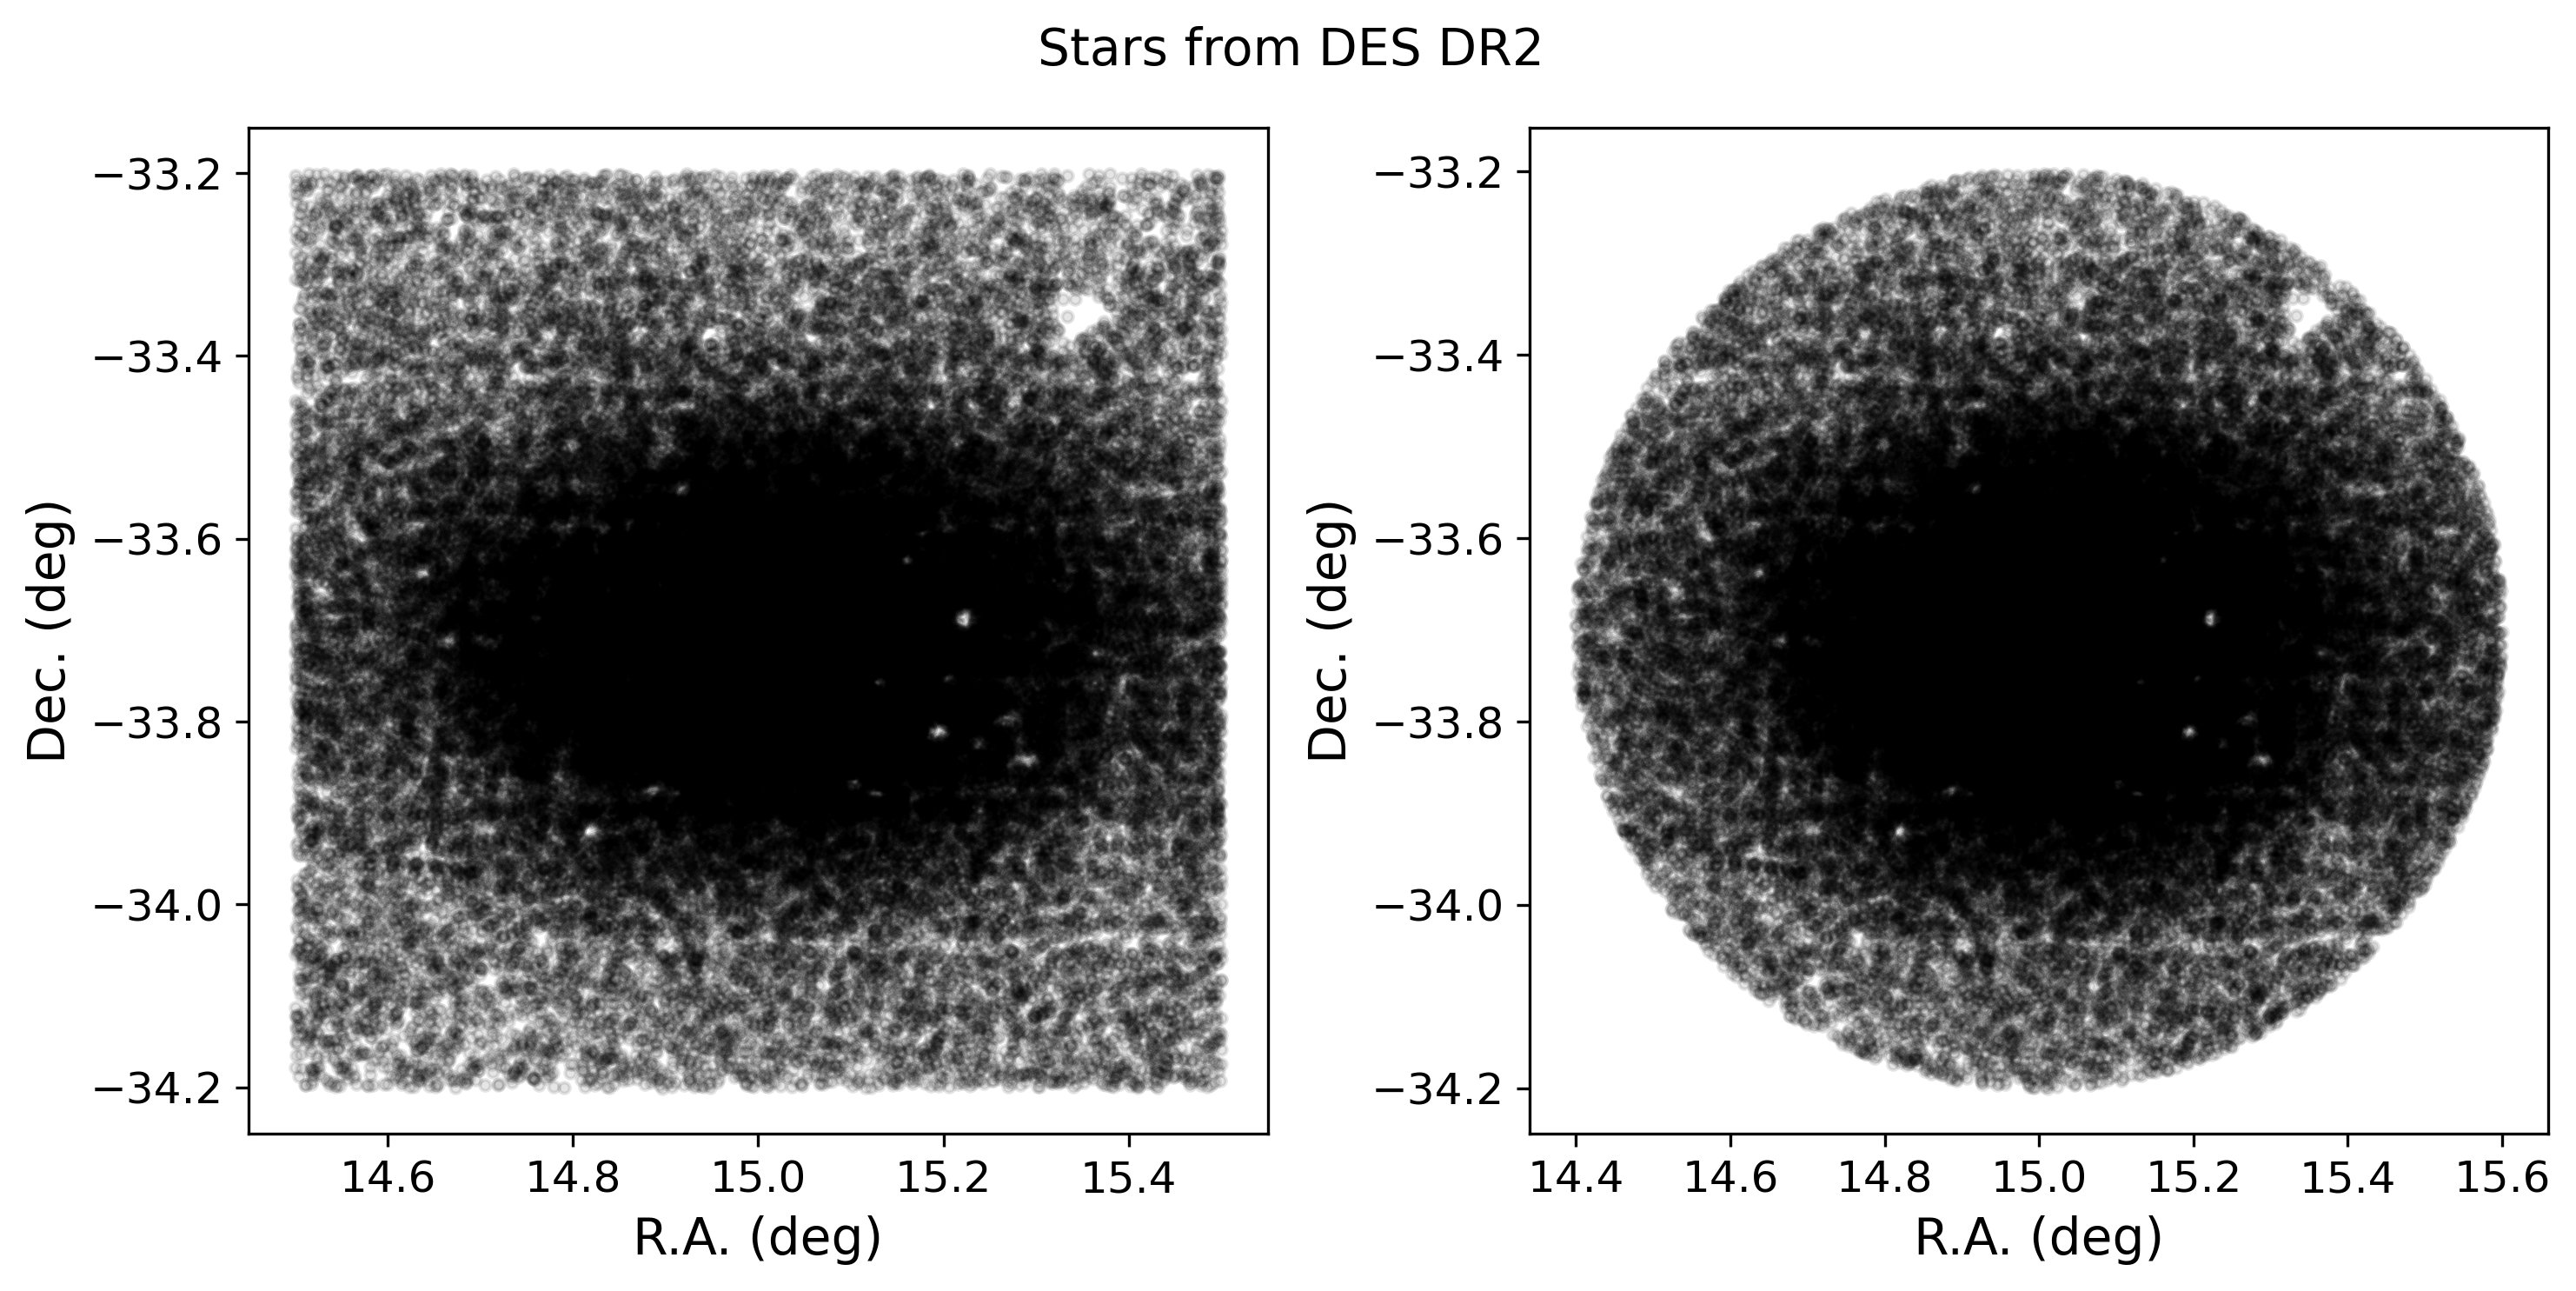

In [19]:
%%time
plt.figure(figsize=[10,5], dpi=300)
plt.suptitle("Stars from DES DR2", fontsize=14)
plt.subplot(1,2,1)
plt.plot(dados_exemplo_1.ra, dados_exemplo_1.dec, 'k.', alpha=0.1)
plt.xlabel("R.A. (deg)", fontsize=14)
plt.ylabel("Dec. (deg)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1,2,2)
plt.plot(dados_exemplo_2.ra, dados_exemplo_2.dec, 'k.', alpha=0.1)
plt.xlabel("R.A. (deg)", fontsize=14)
plt.ylabel("Dec. (deg)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

#### Mapa de densidade

CPU times: user 292 ms, sys: 248 ms, total: 539 ms
Wall time: 290 ms


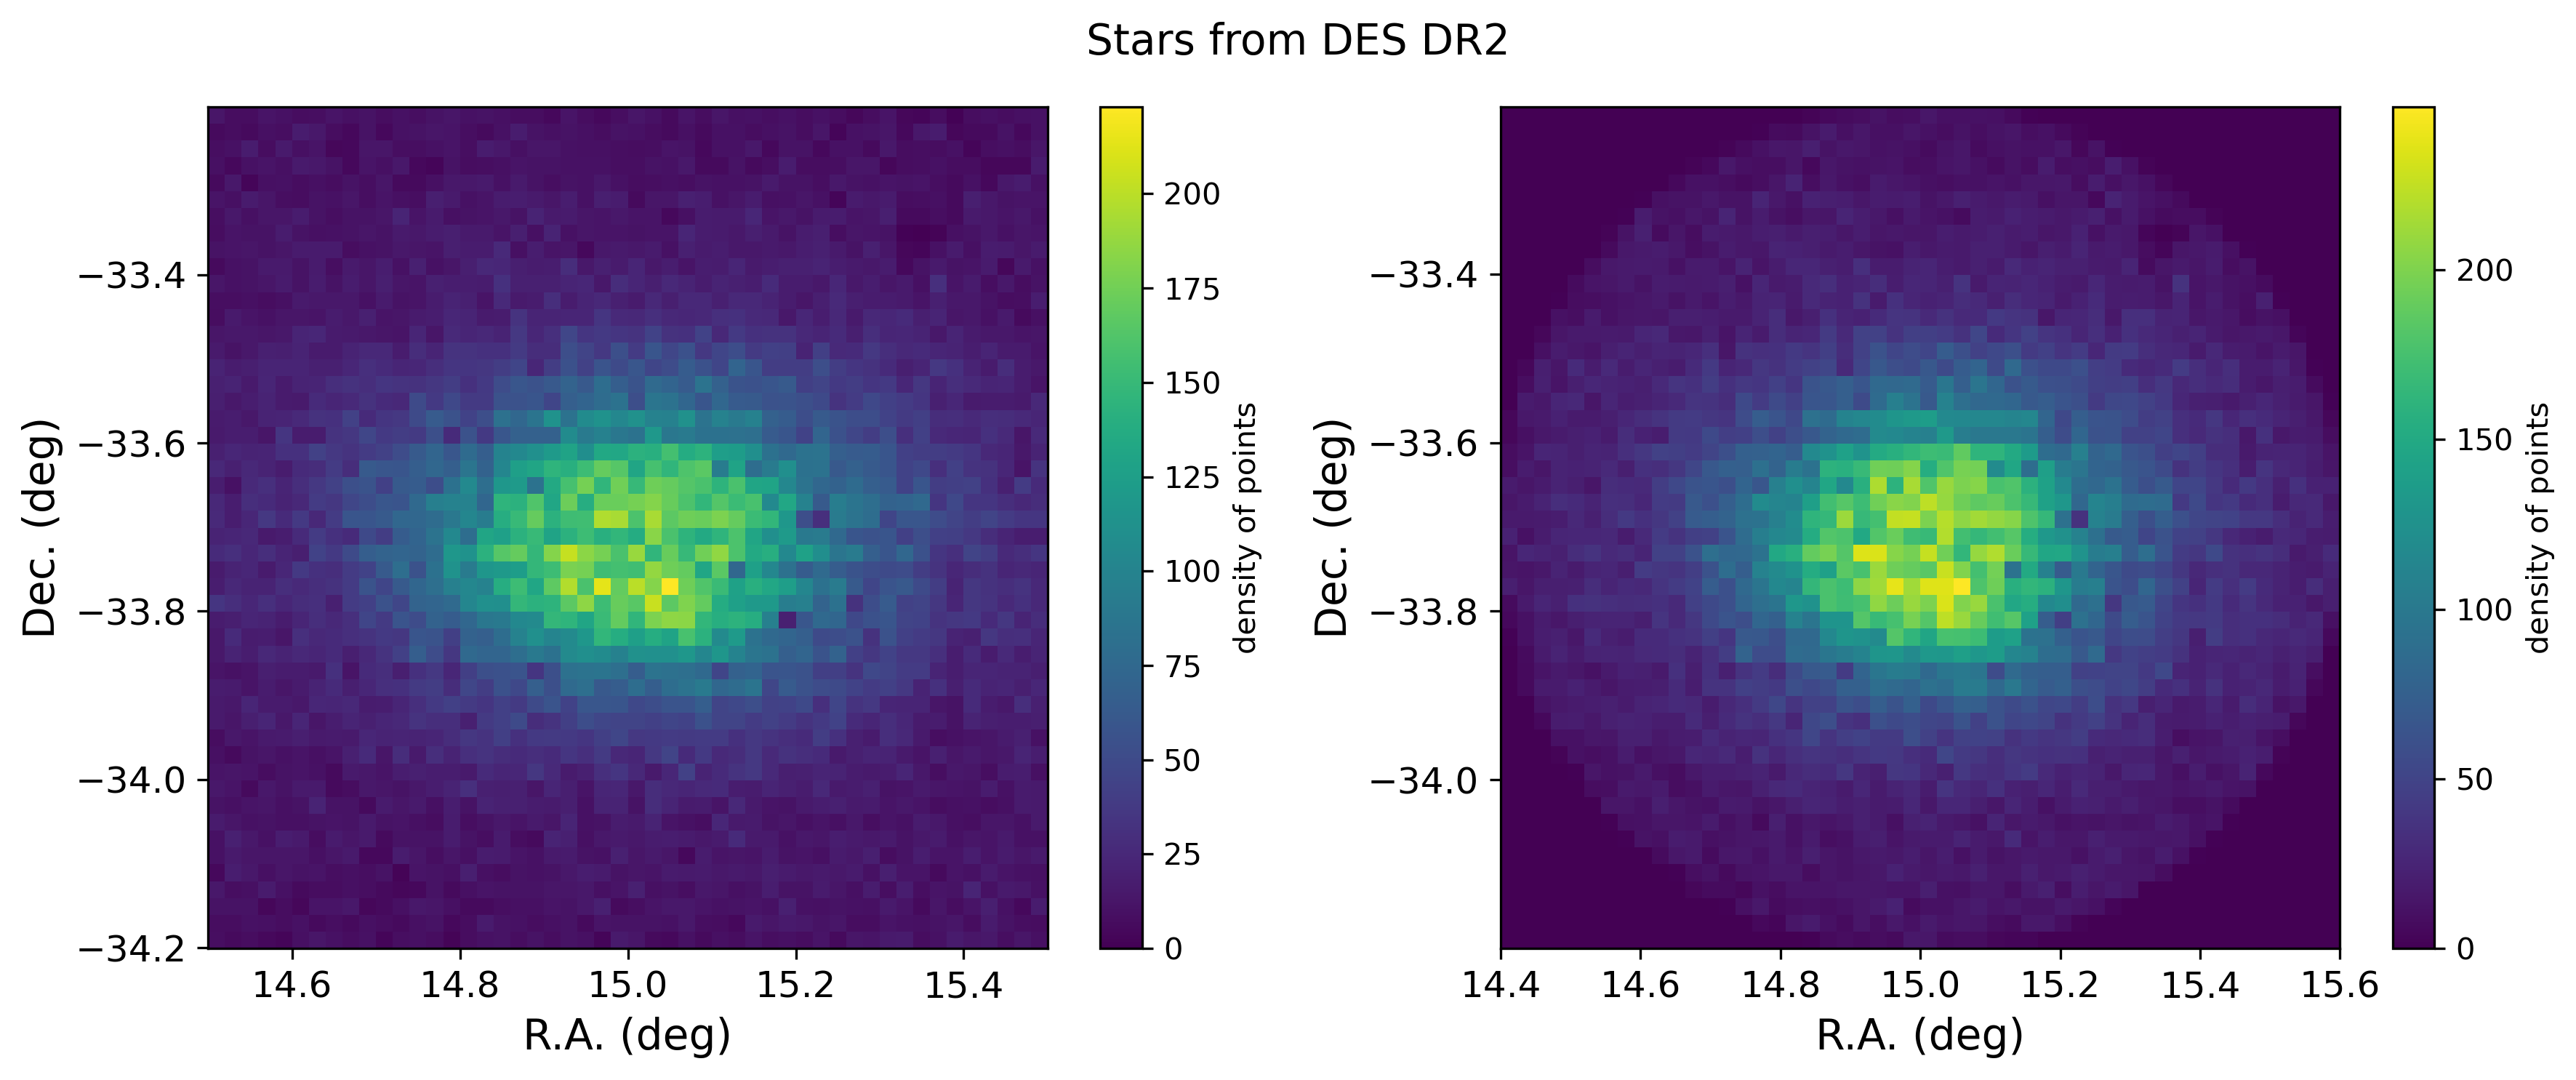

In [20]:
%%time
plt.figure(figsize=[12,5], dpi=300)
plt.suptitle("Stars from DES DR2", fontsize=14)
plt.subplot(1,2,1)
plt.hist2d(dados_exemplo_1.ra, dados_exemplo_1.dec, bins=50)
plt.xlabel("R.A. (deg)", fontsize=14)
plt.ylabel("Dec. (deg)", fontsize=14)
plt.colorbar(label="density of points")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1,2,2)
plt.hist2d(dados_exemplo_2.ra, dados_exemplo_2.dec, bins=50)
plt.xlabel("R.A. (deg)", fontsize=14)
plt.ylabel("Dec. (deg)", fontsize=14)
plt.colorbar(label="density of points")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

*** 

Para o gráfico do CMD, vamos utilizar apenas o exemplo 2. 

In [21]:
dados = dados_exemplo_2
del dados_exemplo_1   # limpando da memória os dataframes
del dados_exemplo_2   # que não vamos mais utilizar 

Por conveniência, podemos alterar os nomes de algumas colunas. 

In [22]:
new_columns = {"coadd_object_id": "object_id",
               "mag_auto_g_dered": "mag_g",
               "mag_auto_r_dered": "mag_r",
               "mag_auto_i_dered": "mag_i",
               "magerr_auto_g": "err_g", 
               "magerr_auto_r": "err_r", 
               "magerr_auto_i": "err_i"}

dados.rename(columns=new_columns, inplace=True)

In [23]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92079 entries, 0 to 92078
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   object_id  92079 non-null  int64  
 1   ra         92079 non-null  float64
 2   dec        92079 non-null  float64
 3   flags_g    92079 non-null  int64  
 4   mag_g      92079 non-null  float64
 5   mag_r      92079 non-null  float64
 6   mag_i      92079 non-null  float64
 7   err_g      92079 non-null  float64
 8   err_r      92079 non-null  float64
 9   err_i      92079 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 7.0 MB


In [24]:
dados.head()

,object_id,ra,dec,flags_g,mag_g,mag_r,mag_i,err_g,err_r,err_i
0,1128471439,14.926212,-34.195554,0,23.617884,23.387201,23.344702,0.052331,0.059823,0.095234
1,1128470994,14.925798,-34.192268,0,24.126692,24.006340,24.064320,0.139008,0.171081,0.308078
2,1128471035,14.937076,-34.192203,0,27.661129,26.805216,25.687660,1.590870,0.993660,0.620178
3,1128471545,14.946218,-34.196531,0,26.732773,26.662535,25.276047,0.916492,1.209289,0.557363
4,1128471283,14.947547,-34.194341,0,25.336414,26.046528,25.089897,0.169583,0.446796,0.311336


Cálculo da cor _g-r_ (nova coluna no _dataframe_ **dados**). 

In [25]:
dados["gmr"] = dados.mag_g - dados.mag_r

In [26]:
dados.head()

,object_id,ra,dec,flags_g,mag_g,mag_r,mag_i,err_g,err_r,err_i,gmr
0,1128471439,14.926212,-34.195554,0,23.617884,23.387201,23.344702,0.052331,0.059823,0.095234,0.230682
1,1128470994,14.925798,-34.192268,0,24.126692,24.006340,24.064320,0.139008,0.171081,0.308078,0.120352
2,1128471035,14.937076,-34.192203,0,27.661129,26.805216,25.687660,1.590870,0.993660,0.620178,0.855913
3,1128471545,14.946218,-34.196531,0,26.732773,26.662535,25.276047,0.916492,1.209289,0.557363,0.070238
4,1128471283,14.947547,-34.194341,0,25.336414,26.046528,25.089897,0.169583,0.446796,0.311336,-0.710114


Limpeza da amostra: vamos selecionar apenas estrelas com fotometria de boa qualidade na banda _g_ (`flags_g < 4`) e com medidas bem sucedidas nas magnitudes ($mag \neq 99.$) . 

In [27]:
dados.query("flags_g < 4  & mag_g != 99. & mag_r != 99. & mag_i != 99. ", inplace=True)

In [28]:
dados.count()

object_id    90770
ra           90770
dec          90770
flags_g      90770
mag_g        90770
mag_r        90770
mag_i        90770
err_g        90770
err_r        90770
err_i        90770
gmr          90770
dtype: int64

In [29]:
dados.describe()

,object_id,ra,dec,flags_g,mag_g,mag_r,mag_i,err_g,err_r,err_i,gmr
count,9.077000e+04,90770.000000,90770.000000,90770.000000,90770.000000,90770.000000,90770.000000,90770.000000,90770.000000,90770.000000,90770.000000
mean,1.129288e+09,15.014024,-33.710953,1.006533,24.012128,23.608266,23.571046,0.935420,0.145097,0.280141,0.403861
std,3.413268e+06,0.233991,0.169175,1.351177,1.709328,1.682417,1.773572,199.793512,0.660568,4.081659,0.461513
min,1.121171e+09,14.399662,-34.199815,0.000000,15.297066,14.984582,15.734713,0.000225,0.000219,0.000285,-5.007725
25%,1.128461e+09,14.861638,-33.815625,0.000000,23.263477,22.961474,22.910596,0.050959,0.050661,0.084091,0.178961
50%,1.130832e+09,15.015914,-33.713702,0.000000,24.285604,23.990279,24.003217,0.104846,0.105226,0.182337,0.338413
75%,1.131137e+09,15.166282,-33.609204,3.000000,25.136433,24.747085,24.745651,0.193346,0.177665,0.305611,0.516561
max,1.131188e+09,15.600079,-33.202071,3.000000,38.823757,31.349447,33.540947,60121.039062,120.758568,1098.342163,12.784710


#### CMD de Estrelas no DES DR2

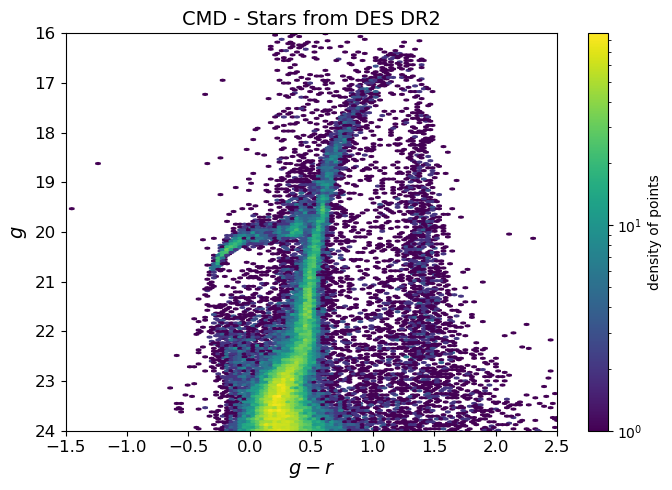

In [30]:
plt.figure(figsize=[7,5])
plt.title("CMD - Stars from DES DR2", fontsize=14)
plt.hexbin(dados.gmr, dados.mag_r, gridsize=500, bins='log')
plt.xlabel("$g - r$", fontsize=14)
plt.ylabel("$g$", fontsize=14)
plt.colorbar(label="density of points")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-1.5,2.5)
plt.ylim(24,16)
plt.tight_layout()

--- 

Este notebook foi obtido no repositório [jupyterhub-tutorial](https://github.com/linea-it/jupyterhub-tutorial)
